In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
import joblib
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [2]:
# Loading saved models
models = []
models.append(joblib.load('models/classifier_0.joblib'))
models.append(joblib.load('models/classifier_1.joblib'))
models.append(joblib.load('models/classifier_2.joblib'))
models.append(joblib.load('models/classifier_3.joblib'))
models.append(joblib.load('models/classifier_4.joblib'))

In [3]:
df = pd.read_csv('_data/aflow_training_set_with_cluster_label.csv')
df = df.drop(columns=['Unnamed: 0'], axis=1)

# lists to store ROC AUC curve data for each model
fprs = []
tprs = []
roc_aucs = []

# lists to store F1 scores and accuracies for each model
f1_scores = []
accuracies = []

X_test = []
y_test = []

for i in range(5):
    cluster_data = df[df['cluster_label'] == i]
    X = cluster_data.drop(columns=['cluster_label', 'Egap', 'gap_type', 'is_metal'], axis=1)
    y = cluster_data['gap_type']
    le = LabelEncoder()
    y = le.fit_transform(y)
    X_trainval, Xi, y_trainval, yi = train_test_split(X, y, test_size=0.2, random_state=42)
    X_test.append(Xi)
    y_test.append(yi)

In [4]:
for i in range(5):
    # predictions on test data
    y_pred = models[i].predict(X_test[i])
    y_proba = models[i].predict_proba(X_test[i])[:, 1]

    # ROC AUC curve data
    fpr, tpr, _ = roc_curve(y_test[i], y_proba)
    roc_auc = auc(fpr, tpr)
    
    # Appending ROC AUC curve data to lists
    fprs.append(fpr)
    tprs.append(tpr)
    roc_aucs.append(roc_auc)
    
    # Calculation of F1 scores and accuracies
    f1_scores.append(f1_score(y_test[i], y_pred))
    accuracies.append(accuracy_score(y_test[i], y_pred))

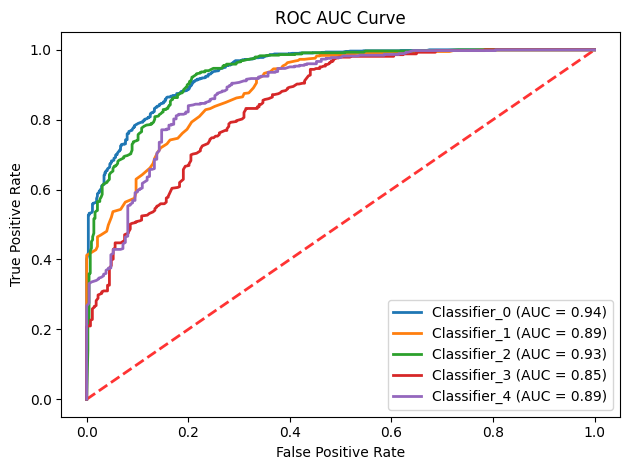

Model 0 - F1 Score: 0.9004, Accuracy: 0.8684
Model 1 - F1 Score: 0.8614, Accuracy: 0.8132
Model 2 - F1 Score: 0.8914, Accuracy: 0.8673
Model 3 - F1 Score: 0.8332, Accuracy: 0.7805
Model 4 - F1 Score: 0.8896, Accuracy: 0.8394


In [6]:
plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
for i, roc_auc in enumerate(roc_aucs):
    plt.plot(fprs[i], tprs[i], lw=2, label='Classifier_%d (AUC = %0.2f)' % (i, roc_auc))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('plots/clusters_roc_auc.pdf')
plt.show()

# Print F1 scores and accuracies for each model
for i, model in enumerate(models):
    print('Model %d - F1 Score: %0.4f, Accuracy: %0.4f' % (i, f1_scores[i], accuracies[i]))